In [11]:
import math
import warnings
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from scipy import stats
import statsmodels.formula.api as smf
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format


# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

crime = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', sep=None, thousands=',', engine='python')


# city = crime['Table 8'][4:352]
population = crime['Unnamed: 1'][4:352]
burglary = crime['Unnamed: 9'][4:352]
larceny = crime['Unnamed: 10'][4:352]
motor_vehicle_theft = crime['Unnamed: 11'][4:352]
arson = crime['Unnamed: 12'][4:352].fillna(0)

display(crime.head())

# y = [murder]
# x = [robbery]

# plt.scatter(x, y)

# print(x)
features = pd.get_dummies(population)

features['Population'] = population

features['Population Squared'] = population.astype(int) **2

features['Burglary'] = np.where(burglary.astype(int) > 0, 1, 0)

# Check to make sure it worked.
print(burglary.groupby(features['Burglary']).describe())

features['Larceny'] = np.where(larceny.astype(int) > 0, 1, 0)

# Check to make sure it worked.
print(larceny.groupby(features['Larceny']).describe())

features['Motor Vehicle'] = np.where(motor_vehicle_theft.astype(int) > 0, 1, 0)

# Check to make sure it worked.
print(motor_vehicle_theft.groupby(features['Motor Vehicle']).describe())

features['Arson'] = np.where(arson.astype(int) > 0, 1, 0)

# Check to make sure it worked.
print(arson.groupby(features['Arson']).describe())



,﻿Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,nan
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,nan


Burglary        
0         count      21
          unique      1
          top         0
          freq       21
1         count     327
          unique    123
          top         6
          freq       15
Name: Unnamed: 9, dtype: object
Larceny        
0        count       7
         unique      1
         top         0
         freq        7
1        count     341
         unique    231
         top        10
         freq        6
Name: Unnamed: 10, dtype: object
Motor Vehicle        
0              count      93
               unique      1
               top         0
               freq       93
1              count     255
               unique     50
               top         1
               freq       54
Name: Unnamed: 11, dtype: object
Arson        
0      count     294
       unique      2
       top         0
       freq      161
1      count      54
       unique     12
       top         1
       freq       23
Name: Unnamed: 12, dtype: object


In [21]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime['Unnamed: 8'][4:352].values.reshape(-1, 1)
X = features[['Population', 'Burglary','Larceny', 'Motor Vehicle', 'Arson']]
# X_sqrd = X **2
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.69515439e-02   3.70682040e+01  -3.17085630e+01   1.30141515e+02
    2.69886279e+02]]

Intercept: 
 [-27.09516334]

R-squared:
0.992802886205


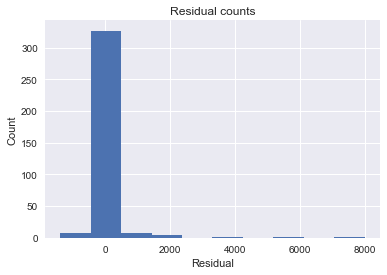

In [22]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = crime['Unnamed: 8'][4:352].astype(int)

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# print(actual)

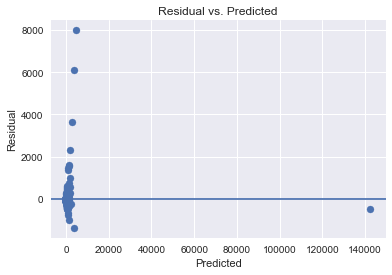

In [23]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [24]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Burglary,Larceny,Motor Vehicle,Arson
Burglary,1.000,0.479,0.338,0.075
Larceny,0.479,1.000,0.237,0.061
Motor Vehicle,0.338,0.237,1.000,0.169
Arson,0.075,0.061,0.169,1.000


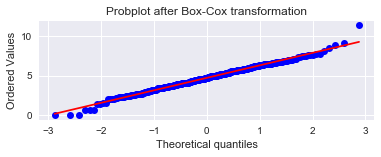

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
xt, _ = stats.boxcox(actual.replace('0', actual.mean()))
stats.probplot(xt, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot after Box-Cox transformation')

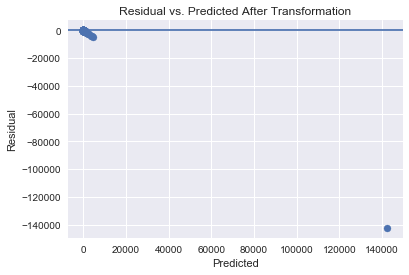

In [26]:
actual2 = stats.boxcox(actual.replace('0', actual.mean()))

residual2 = actual2[0] - predicted

#Residual vs Predicted after Box-cox Transformation
plt.scatter(predicted, residual2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted After Transformation')
plt.show()

# print(actual2[0])

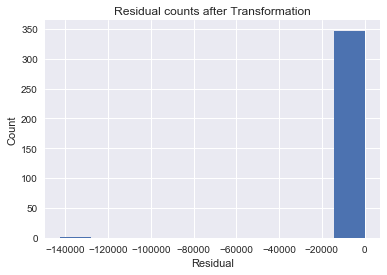

In [27]:
plt.hist(residual2)
plt.title('Residual counts after Transformation')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()